In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

from functions import *

%load_ext autoreload
%autoreload 2

# Load data
data = pd.read_csv('Data/non_nan_data.csv')
data = data.drop(['sun_mean', 'wind_mean', 'temp_mean', 'DK1_spot'], axis=1)

# Split data
data_train = data[(data['DATE'] >= '2014-01-01') & (data['DATE'] < '2023-01-01')].drop(['DATE'], axis=1).to_numpy()
data_test = data[data['DATE'] >= '2023-01-01'].drop(['DATE'], axis=1).to_numpy()

# Lag weather data by one hour
y_train = data_train[:, 0]
y_test = data_test[:, 0]

# weather_train = data_train[:-1, 1:-2]
# weather_test = data_test[:-1, 1:-2]

# exog_train = weather_train
# exog_test = weather_test


y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

## Seasonal ARMA

SMAPE baseline (24 lags) out of sample prediction: 23.21799275150031


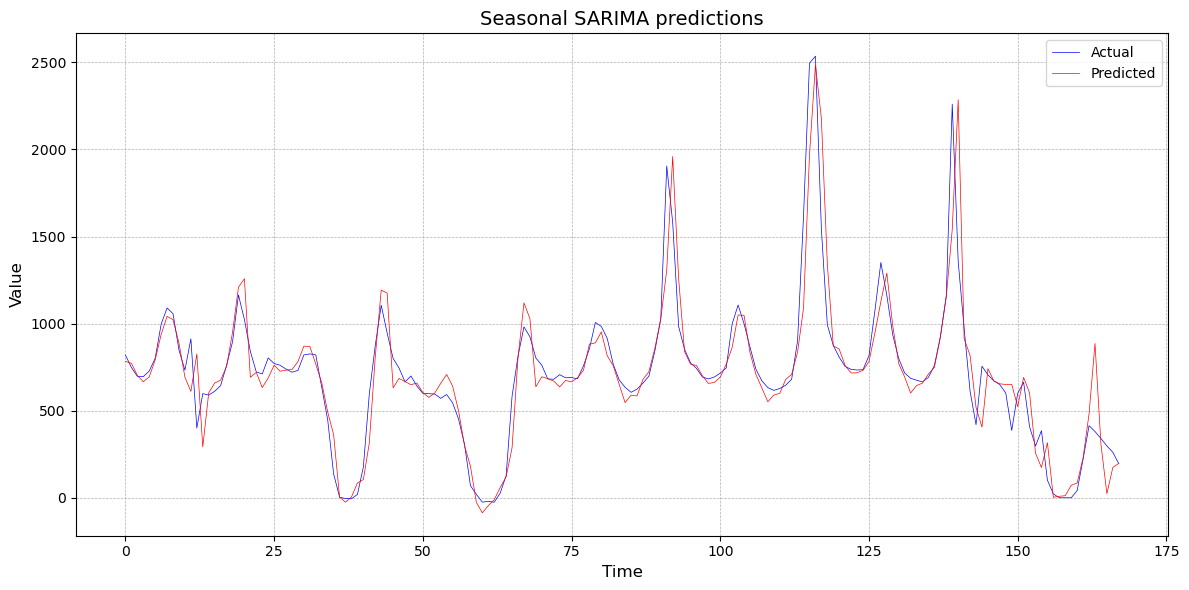

In [2]:
# Fit SARIMAX model
# Replace (p, d, q) and (P, D, Q, s) with appropriate orders based on your data
p, d, q = 1, 0, 1
P, D, Q, s = 1, 0, 1, 24  # No seasonal component for simplicity

smoother_output = 0

model = SARIMAX(
    y_train,
    order=(p, d, q),
    seasonal_order=(P, D, Q, s),
    **{'smoother_output': smoother_output}
)
results = model.fit(disp=False)

# Use the model to predict without refitting
new_results = results.append(y_test, refit=False)

# Get predictions for the test period
predictions = new_results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

smape_baseline = smape(y_test, predictions)

print(f'SMAPE baseline (24 lags) out of sample prediction: {smape_baseline}')

plot_actual_vs_predicted(y_test, predictions, "Seasonal SARIMA predictions")

## ARMA

SMAPE baseline (24 lags) out of sample prediction: 22.858720914468396


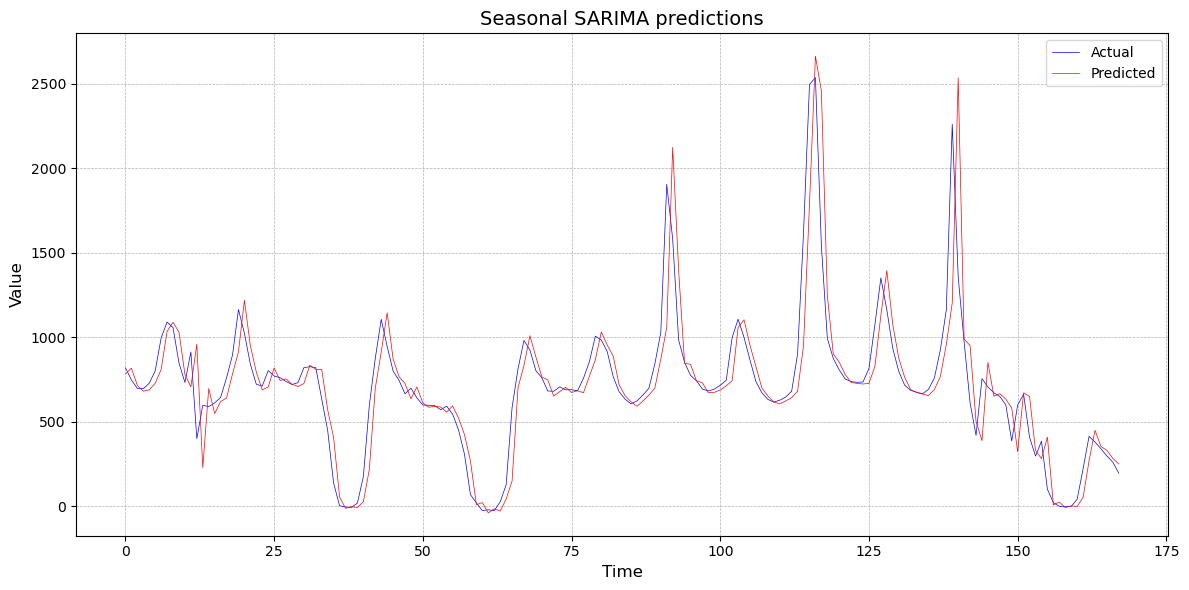

In [3]:
p, d, q = 1, 0, 1
P, D, Q, s = 0, 0, 0, 0  # No seasonal component for simplicity

smoother_output = 0

model = SARIMAX(
    y_train,
    order=(p, d, q),
    seasonal_order=(P, D, Q, s),
    **{'smoother_output': smoother_output}
)
results = model.fit(disp=False)

# Use the model to predict without refitting
new_results = results.append(y_test, refit=False)

# Get predictions for the test period
predictions = new_results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

smape_baseline = smape(y_test, predictions)

print(f'SMAPE baseline (24 lags) out of sample prediction: {smape_baseline}')

plot_actual_vs_predicted(y_test, predictions, "Seasonal SARIMA predictions")